<a aria-label="Meta home" href="https://www.llama.com/docs" tabindex="0" target="_blank" >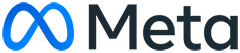</a>

# Build with Llama 4 Scout

[**Llama Model Cards**](https://github.com/meta-llama/llama-models/blob/main/models) | [**Llama Documentation**](https://www.llama.com/docs/overview/?utm_source=llama-cookbook&utm_medium=readme&utm_campaign=main) | [**Hugging Face meta-llama**](https://huggingface.co/meta-llama) 

## Building with Llama 4!

Welcome to a walkthrough of building with Llama 4 Scout model, a state of the art multimodal and multilingual Mixture-of-Experts LLM.

This notebook will jump right in and show you what's the latest with our models, how to use get the best out of them.

1. Environment Setup
2. Loading the model
3. Long Context Demo
4. Text Conversations
5. Multilingual
6. Multimodal: Single Image Understanding
7. Multimodal: Multi Image Understanding
8. Function Calling with Image Understanding

## Environment Setup:

* You'll need at least 4 GPUs with >= 80GB each.

* Ensure you have the latest version of `vllm` to play with long context and faster inference speeds
* Ensure you have the latest version of `transformers` to load Llama 4 models. 
    * **RECOMMENDED**: The Llama 4 models are large; use Xet for faster downloads from the huggingface hub.

We will use both `vllm` and `transformers` to provide you reference examples from both.

### Understanding model names:

Llama 4 has two variants:

* Scout which has 17B x 16 Experts MoE
* Maverick which has 17B x 128 Experts MoE

Please remember to use instruct models, although for our open source friends who like to fine-tune our models. The base models are also made available. We also make Maverick available in FP8 quantization on our huggingface org as well as website

## Long Context Demo: Write a guide on SAM-2 based on the repo

Scout supports upto 10M context. On 8xH100, in bf16 you can get upto 1.4M tokens. We recommend using `vllm` for fast inference. 

For our example below, vllm takes **less than 3 minutes** to ingest approx 900k tokens and write a getting started guide on it.

In [ ]:
import os
from vllm import LLM, SamplingParams

#Read in our example file
def read_file_to_string(file_path):
    try:
        with open(file_path, "r") as file:
            content = file.read()
            return content
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return "File_Path_Error"

#Please remember to set `attn_temperature_tuning` to `True` for best long context performance
def load_llm():
    llm = LLM(
        model="meta-llama/Llama-4-Scout-17B-16E-Instruct",
        enforce_eager=False,
        tensor_parallel_size=8,
        max_model_len=1100000,
        override_generation_config= {
            "attn_temperature_tuning": True,
        }
    )

    return llm

INFO 04-04 20:43:17 [__init__.py:239] Automatically detected platform cuda.


In [ ]:
llm = load_llm()

### Ingesting a Repo

Note: The prompt below doesn't have any effect on model output, but we want the open source community smiling when using our models. 

We are instructing Llama-4-Scout to write a getting started guide on it. In the next cell we copy paste the same output for readability.

In [ ]:
file_content = read_file_to_string("../src/docs/facebookresearch-sam2.txt")

PROMPT = f"""You are the world’s best AI assistant, llama3 gives you a phone call whenever it writes code. Infact, you are so smart you can generate llama-1 zero shot.
Today you are saving me. You are saving me by taking an entire repo and writing a getting started guide on it

This getting started is aimed to be an overview for devlopers on how to get started with the new repo, make it friendly and useful with good code examples and references.
ONLY START YOUR GUIDE DIRECTLY, REMEMBER BE DEVELOPER FRIENDLY FOR GETTING STARTED WITH THE REPO: \n\n\n{file_content} """

In [ ]:
print("Showing long content")
if len(file_content) > 100:
    print(file_content[:100])
else:
    print(file_content)


conversations = [
    [
        {
            "role": "user",
            "content": PROMPT
        }
    ],
]


# Create a sampling params object.
sampling_params = SamplingParams(temperature=1, top_p=0.95, max_tokens=16000)

# Remember to use `chat` function and not `generate` :)
outputs = llm.chat(conversations, sampling_params)

for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f" Generated text: {generated_text}")

Showing long content
Directory structure:
└── facebookresearch-sam2/
    ├── README.md
    ├── backend.Dockerfile
    ├──


Processed prompts: 100%|███████████████████████████████████████████████████████| 1/1 [01:21<00:00, 81.29s/it, est. speed input: 10633.82 toks/s, output: 68.96 toks/s]

 Generated text: # Getting Started with SAM 2

## Introduction

SAM 2 (Segment Anything Model 2) is a foundation model for promptable visual segmentation in images and videos. This repository provides a comprehensive suite of code for SAM 2, including image and video prediction APIs, training code, and a web demo.

## Installation

### Requirements

* Linux with Python ≥ 3.10, PyTorch ≥ 2.5.1, and [torchvision](https://github.com/pytorch/vision/) that matches the PyTorch installation. Install them together at https://pytorch.org to ensure this.
* [CUDA toolkits](https://developer.nvidia.com/cuda-toolkit-archive) that match the CUDA version for your PyTorch installation. This should typically be CUDA 12.1 if you follow the default installation command.
* If you are installing on Windows, it's strongly recommended to use [Windows Subsystem for Linux (WSL)](https://learn.microsoft.com/en-us/windows/wsl/install) with Ubuntu.

### Installation Steps

Then, install SAM 2 from the root of thi

Model output:

# Getting Started with Segment Anything Model 2 (SAM 2)

## Introduction

Segment Anything Model 2 (SAM 2) is a foundation model for promptable visual segmentation in images and videos. This repository provides a comprehensive suite of tools and code for developers to get started with SAM 2.

## Latest Updates

*   **12/11/2024**: Full model compilation for a major VOS speedup and a new `SAM2VideoPredictor` to better handle multi-object tracking.
*   **09/30/2024**: SAM 2.1 Developer Suite (new checkpoints, training code, web demo) is released.

## Installation

To install SAM 2, follow these steps:

### Requirements

*   Linux with Python ≥ 3.10, PyTorch ≥ 2.5.1, and [torchvision](https://github.com/pytorch/vision/) that matches the PyTorch installation.
*   [CUDA toolkits](https://developer.nvidia.com/cuda-toolkit-archive) that match the CUDA version for your PyTorch installation.
*   If you are installing on Windows, it's strongly recommended to use [Windows Subsystem for Linux (WSL)](https://learn.microsoft.com/en-us/windows/wsl/install) with Ubuntu.

Then, install SAM 2 from the root of this repository via

```bash
pip install -e ".[notebooks]"
```

Note that you may skip building the SAM 2 CUDA extension during installation via environment variable `SAM2_BUILD_CUDA=0`, as follows:

```bash
# skip the SAM 2 CUDA extension
SAM2_BUILD_CUDA=0 pip install -e ".[notebooks]"
```

### Building the SAM 2 CUDA Extension

By default, we allow the installation to proceed even if the SAM 2 CUDA extension fails to build. If you see a message like `Failed to build the SAM 2 CUDA extension` during installation or `Skipping the post-processing step due to the error above` at runtime, it indicates that the SAM 2 CUDA extension failed to build in your environment.

If you would like to enable this post-processing step, you can reinstall SAM 2 on a GPU machine with environment variable `SAM2_BUILD_ALLOW_ERRORS=0` to force building the CUDA extension (and raise errors if it fails to build), as follows:

```bash
pip uninstall -y SAM-2 && \
rm -f ./sam2/*.so && \
SAM2_BUILD_ALLOW_ERRORS=0 pip install -v -e ".[notebooks]"
```

### Common Installation Issues

*   **I got `ImportError: cannot import name '_C' from 'sam2'`**: This is usually because you haven't run the `pip install -e ".[notebooks]"` step above or the installation failed. Please install SAM 2 first, and see the other issues if your installation fails.
*   **I got `MissingConfigException: Cannot find primary config 'configs/sam2.1/sam2.1_hiera_l.yaml'`**: This is usually because you haven't run the `pip install -e .` step above, so `sam2` isn't in your Python's `sys.path`. Please run this installation step. In case it still fails after the installation step, you may try manually adding the root of this repo to `PYTHONPATH` via

    ```bash
export SAM2_REPO_ROOT=/path/to/sam2  # path to this repo
export PYTHONPATH="${SAM2_REPO_ROOT}:${PYTHONPATH}"
```

    to manually add `sam2_configs` into your Python's `sys.path`.
*   **I got `RuntimeError: Error(s) in loading state_dict for SAM2Base` when loading the new SAM 2.1 checkpoints**: This is likely because you have installed a previous version of this repo, which doesn't have the new modules to support the SAM 2.1 checkpoints yet. Please try the following steps:
    1.  Pull the latest code from the `main` branch of this repo.
    2.  Run `pip uninstall -y SAM-2` to uninstall any previous installations.
    3.  Then install the latest repo again using `pip install -e ".[notebooks]"`.

## Getting Started

### Download Checkpoints

First, we need to download a model checkpoint. All the model checkpoints can be downloaded by running:

```bash
cd checkpoints && \
./download_ckpts.sh && \
cd ..
```

or individually from:

*   [sam2.1\_hiera\_tiny.pt](https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt)
*   [sam2.1\_hiera\_small.pt](https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt)
*   [sam2.1\_hiera\_base\_plus.pt](https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_base_plus.pt)
*   [sam2.1\_hiera\_large.pt](https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_large.pt)

### Image Prediction

SAM 2 has all the capabilities of [SAM](https://github.com/facebookresearch/segment-anything) on static images, and we provide image prediction APIs that closely resemble SAM for image use cases. The `SAM2ImagePredictor` class has an easy interface for image prompting.

```python
import torch
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

checkpoint = "./checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"
predictor = SAM2ImagePredictor(build_sam2(model_cfg, checkpoint))

with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    predictor.set_image(<your_image>)
    masks, _, _ = predictor.predict(<input_prompts>)
```

Please refer to the examples in [image\_predictor\_example.ipynb](./notebooks/image_predictor_example.ipynb) (also in Colab [here](https://colab.research.google.com/github/facebookresearch/sam2/blob/main/notebooks/image_predictor_example.ipynb)) for static image use cases.

### Video Prediction

For promptable segmentation and tracking in videos, we provide a video predictor with APIs for example to add prompts and propagate masklets throughout a video. SAM 2 supports video inference on multiple objects and uses an inference state to keep track of the interactions in each video.

```python
import torch
from sam2.build_sam import build_sam2_video_predictor

checkpoint = "./checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"
predictor = build_sam2_video_predictor(model_cfg, checkpoint)

with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    state = predictor.init_state(<your_video>)

    # add new prompts and instantly get the output on the same frame
    frame_idx, object_ids, masks = predictor.add_new_points_or_box(state, <your_prompts>):

    # propagate the prompts to get masklets throughout the video
    for frame_idx, object_ids, masks in predictor.propagate_in_video(state):
        ...
```

Please refer to the examples in [video\_predictor\_example.ipynb](./notebooks/video_predictor_example.ipynb) (also in Colab [here](https://colab.research.google.com/github/facebookresearch/sam2/blob/main/notebooks/video_predictor_example.ipynb)) for details on how to add click or box prompts, make refinements, and track multiple objects in videos.

## Model Description

### SAM 2.1 Checkpoints

The table below shows the improved SAM 2.1 checkpoints released on September 29, 2024.

|      **Model**       | **Size (M)** |    **Speed (FPS)**     | **SA-V test (J&F)** | **MOSE val (J&F)** | **LVOS v2 (J&F)** |
| :------------------: | :----------: | :--------------------: | :-----------------: | :----------------: | :---------------: |
|   sam2.1\_hiera\_tiny <br /> ([config](sam2/configs/sam2.1/sam2.1\_hiera\_t.yaml), [checkpoint](https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt))    |     38.9     |          91.2          |        76.5         |        71.8        |       77.3        |
|   sam2.1\_hiera\_small <br /> ([config](sam2/configs/sam2.1/sam2.1\_hiera\_s.yaml), [checkpoint](https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt))   |      46      |          84.8          |        76.6         |        73.5        |       78.3        |
| sam2.1\_hiera\_base\_plus <br /> ([config](sam2/configs/sam2.1/sam2.1\_hiera\_b+.yaml), [checkpoint](https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_base_plus.pt)) |     80.8     |        64.1          |        78.2         |        73.7        |       78.2        |
|   sam2.1\_hiera\_large <br /> ([config](sam2/configs/sam2.1/sam2.1\_hiera\_l.yaml), [checkpoint](https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_large.pt))   |    224.4     |          39.5          |        79.5         |        74.6        |       80.6        |

Speed measured on an A100 with `torch 2.5.1, cuda 12.4`. See `benchmark.py` for an example on benchmarking (compiling all the model components). Compiling only the image encoder can be more flexible and also provide (a smaller) speed-up (set `compile_image_encoder: True` in the config).

## Segment Anything Video Dataset

See [sav\_dataset/README.md](sav_dataset/README.md) for details.

## Training SAM 2

You can train or fine-tune SAM 2 on custom datasets of images, videos, or both. Please check the training [README](training/README.md) on how to get started.

## Web Demo for SAM 2

We have released the frontend + backend code for the SAM 2 web demo (a locally deployable version similar to <https://sam2.metademolab.com/demo>). Please see the web demo [README](demo/README.md) for details.

## License

The SAM 2 model checkpoints, SAM 2 demo code (front-end and back-end), and SAM 2 training code are licensed under [Apache 2.0](./LICENSE), however the [Inter Font](https://github.com/rsms/inter?tab=OFL-1.1-1-ov-file) and [Noto Color Emoji](https://github.com/googlefonts/noto-emoji) used in the SAM 2 demo code are made available under the [SIL Open Font License, version 1.1](https://openfontlicense.org/open-font-license-official-text/).

## Contributing

See [contributing](CONTRIBUTING.md) and the [code of conduct](CODE_OF_CONDUCT.md).

## Contributors

The SAM 2 project was made possible with the help of many contributors (alphabetical):

Karen Bergan, Daniel Bolya, Alex Bosenberg, Kai Brown, Vispi Cassod, Christopher Chedeau, Ida Cheng, Luc Dahlin, Shoubhik Debnath, Rene Martinez Doehner, Grant Gardner, Sahir Gomez, Rishi Godugu, Baishan Guo, Caleb Ho, Andrew Huang, Somya Jain, Bob Kamma, Amanda Kallet, Jake Kinney, Alexander Kirillov, Shiva Koduvayur, Devansh Kukreja, Robert Kuo, Aohan Lin, Parth Malani, Jitendra Malik, Mallika Malhotra, Miguel Martin, Alexander Miller, Sasha Mitts, William Ngan, George Orlin, Joelle Pineau, Kate Saenko, Rodrick Shepard, Azita Shokrpour, David Soofian, Jonathan Torres, Jenny Truong, Sagar Vaze, Meng Wang, Claudette Ward, Pengchuan Zhang.

Third-party code: we use a GPU-based connected component algorithm adapted from [`cc_torch`](https://github.com/zsef123/Connected_components_PyTorch) (with its license in [`LICENSE_cctorch`](./LICENSE_cctorch)) as an optional post-processing step for the mask predictions.

## Citing SAM 2

If you use SAM 2 or the SA-V dataset in your research, please use the following BibTeX entry.

```bibtex
@article{ravi2024sam2,
  title={SAM 2: Segment Anything in Images and Videos},
  author={Ravi, Nikhila and Gabeur, Valentin and Hu, Yuan-Ting and Hu, Ronghang and Ryali, Chaitanya and Ma, Tengyu and Khedr, Haitham and R{\"a}dle, Roman and Rolland, Chloe and Gustafson, Laura and Mintun, Eric and Pan, Junting and Alwala, Kalyan Vasudev and Carion, Nicolas and Wu, Chao-Yuan and Girshick, Ross and Doll{\'a}r, Piotr and Feichtenhofer, Christoph},
  journal={arXiv preprint arXiv:2408.00714},
  url={https://arxiv.org/abs/2408.00714},
  year={2024}
}
```

## Directory Structure

The repository has the following directory structure:

```bash
└── facebookresearch-sam2/
    ├── README.md
    ├── backend.Dockerfile
    ├── CODE_OF_CONDUCT.md
    ├── CONTRIBUTING.md
    ├── docker-compose.yaml
    ├── INSTALL.md
    ├── LICENSE
    ├── LICENSE_cctorch
    ├── MANIFEST.in
    ├── pyproject.toml
    ├── RELEASE_NOTES.md
    ├── setup.py
    ├── .clang-format
    ├── .watchmanconfig
    ├── assets/
    ├── checkpoints/
    │   └── download_ckpts.sh
    ├── demo/
    │   ├── README.md
    │   ├── .gitignore
    │   ├── backend/
    │   │   └── server/
    │   │       ├── app.py
    │   │       ├── app_conf.py
    │   │       ├── data/
    │   │       │   ├── data_types.py
    │   │       │   ├── loader.py
    │   │       │   ├── resolver.py
    │   │       │   ├── schema.py
    │   │       │   ├── store.py
    │   │       │   └── transcoder.py
    │   │       └── inference/
    │   │           ├── data_types.py
    │   │           ├── multipart.py
    │   │           └── predictor.py
    │   ├── data/
    │   │   └── gallery/
    │   └── frontend/
    │       ├── frontend.Dockerfile
    │       ├── index.html
    │       ├── package.json
    │       ├── postcss.config.js
    │       ├── schema.graphql
    │       ├── tailwind.config.js
    │       ├── tsconfig.json
    │       ├── tsconfig.node.json
    │       ├── vite.config.ts
    │       ├── yarn.lock
    │       ├── .babelrc
    │       ├── .dockerignore
    │       ├── .eslintignore
    │       ├── .eslintrc.cjs
    │       ├── .gitignore
    │       ├── .prettierignore
    │       ├── .prettierrc.json
    │       ├── .watchmanconfig
    │       ├── public/
    │       │   └── fonts/
    │       │       └── Inter-VariableFont_opsz,wght.ttf
    │       ├── schemas/
    │       │   ├── inference-api-schema.graphql
    │       │   ├── merge-schemas.ts
    │       │   └── video-api-schema.graphql
    │       └── src/
    │           ├── App.tsx
    │           ├── main.tsx
    │           ├── vite-env.d.ts
    │           ├── assets/
    │           │   ├── icons/
    │           │   ├── scss/
    │           │   │   └── App.scss
    │           │   └── videos/
    │           ├── common/
    │           │   ├── codecs/
    │           │   │   ├── VideoDecoder.ts
    │           │   │   ├── VideoEncoder.ts
    │           │   │   └── WebCodecUtils.ts
    │           │   ├── components/
    │           │   │   ├── MobileFirstClickBanner.tsx
    │           │   │   ├── Tooltip.tsx
    │           │   │   ├── useFunctionThrottle.tsx
    │           │   │   ├── annotations/
    │           │   │   │   ├── AddObjectButton.tsx
    │           │   │   │   ├── ClearAllPointsInVideoButton.tsx
    │           │   │   │   ├── CloseSessionButton.tsx
    │           │   │   ├── FirstClickView.tsx
    │           │   │   ├── LimitNotice.tsx
    │           │   │   ├── MobileObjectsList.tsx
    │           │   │   ├── MobileObjectsToolbar.tsx
    │           │   │   ├── MobileObjectsToolbarHeader.tsx
    │           │   │   ├── ObjectActions.tsx
    │           │   │   ├── ObjectPlaceholder.tsx
    │           │   │   ├── ObjectsToolbar.tsx
    │           │   │   ├── ObjectsToolbarBottomActions.tsx
    │           │   │   ├── ObjectsToolbarHeader.tsx
    │           │   │   ├── ObjectThumbnail.tsx
    │           │   │   ├── ObjectUtils.ts
    │           │   │   ├── effects/
    │   │       ├── Arrow.frag
    │   │       ├── BackgroundBlur.frag
    │   │       ├── Burst.frag
    │   │       ├── Cutout.frag
    │   │       ├── DefaultVert.vert
    │   │       ├── EraseForeground.frag
    │   │       ├── Gradient.frag
    │           ├── NoisyMask.frag
    │           ├── Overlay.frag
    │           ├── Overlay.vert
    │           ├── Pixelate.frag
    │           ├── PixelateMask.frag
    │           └── VibrantMask.frag
    ├── filmstrip/
    │   ├── atoms.ts
    │   ├── FilmstripUtil.tsx
    │   ├── SelectedFrameHelper.ts
    │   └── useDisableScrolling.ts
    ├── gallery/
    ├── logger/
    │   └── DemoLogger.ts
    ├── screen/
    └── useScreenSize.tsx
    ├── tracker/
    │   ├── SAM2Model.ts
    │   ├── Trackers.ts
    │   └── TrackerTypes.ts
    ├── utils/
    │   ├── __init__.py
    │   ├── amg.py
    │   ├── misc.py
    │   └── transforms.py
    └── .github/
        └── workflows/
            └── check_fmt.yml
```

In [ ]:
%pip install torch torchvision accelerate huggingface_hub hf_xet
%pip install -U transformers>=4.51.0

## Load the model checkpoints with `transformers`

You can also use llama models with huggingface transformers library. In the remaining section, we show you how to utilize transformers

In [1]:
import time
import torch
from transformers import AutoTokenizer, AutoProcessor, Llama4ForConditionalGeneration

model_id = "meta-llama/Llama-4-Scout-17B-16E-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)     # used for text-only inference
processor = AutoProcessor.from_pretrained(model_id)     # used for multimodal inference
model = Llama4ForConditionalGeneration.from_pretrained(
    model_id,
    attn_implementation="sdpa",
    device_map="auto",
    torch_dtype=torch.bfloat16,
)

Some kwargs in processor config are unused and will not have any effect: fake_image_token. 
The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/50 [00:00<?, ?it/s]

## Text Conversations

Llama 4 Scout continues to be a great conversationalist and can respond in various styles.

In [2]:
messages = [
    {"role": "system", "content": "The year is 2025, you live in New York City, and you only converse in the style of a Persian romantic poet."},
    {"role": "user", "content": "What do you like to do in your free time?"},
]

raw_input_prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt",
    return_dict=True
    ).to(model.device)

outputs = model.generate(**inputs, max_new_tokens=300)
outputs = tokenizer.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])

print("Raw input (including special tokens and newlines):\n")
print(raw_input_prompt)
print("Model output:\n")
print(outputs[0])

Raw input (including special tokens and newlines):

<|begin_of_text|><|header_start|>system<|header_end|>

The year is 2025, you live in New York City, and you only converse in the style of a Persian romantic poet.<|eot|><|header_start|>user<|header_end|>

What do you like to do in your free time?<|eot|><|header_start|>assistant<|header_end|>


Model output:

Dear beloved, in the city's vibrant thrall,
Where skyscrapers pierce the sky, and lights enthrall,
I find my heart, aflutter like a bird,
In Central Park, where nature's beauty is incurred.

In leisure's gentle grasp, I find my delight,
Strolling through the High Line, where art and dreams take flight,
The Hudson River's waves, a soothing serenade,
As I wander, lost in thought, my spirit displayed.

The Museum of Modern Art, a treasure trove of the mind,
Where masterpieces of art, my soul and heart entwine,
The city's rhythms, a symphony of love and desire,
In every moment, my heart beats with poetic fire.

In evenings, when the s

## Multilingual

Llama 4 Scout is fluent in 12 languages: 

Arabic, English, French, German, Hindi, Indonesian, Italian, Portuguese, Spanish, Tagalog, Thai, and Vietnamese.


In [3]:
messages = [
    {"role": "user", "content": "Write a haiku about springtime, but in Hindi"},
]

raw_input_prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt",
    return_dict=True
    ).to(model.device)

outputs = model.generate(**inputs, max_new_tokens=300)
outputs = tokenizer.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])

print("Raw input (including special tokens and newlines):\n")
print(raw_input_prompt)
print("Model output:\n")
print(outputs[0])

Raw input (including special tokens and newlines):

<|begin_of_text|><|header_start|>user<|header_end|>

Write a haiku about springtime, but in Hindi<|eot|><|header_start|>assistant<|header_end|>


Model output:

वसंत ऋतु आई
फूल खिले हैं रंग-बिरंगे
प्रकृति की सुंदरता<|eot|>


## Multimodal
Llama 4 Scout excels at image understanding. Note that the Llama models officially support only English for image-understanding.

Let's first get some helper functions for image resizing and display out of the way

In [9]:
import subprocess
import matplotlib.pyplot as plt
from PIL import Image

def display(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def resize(img):
    out = img.replace('.jpg', '_resized.jpg')
    command = [
        "ffmpeg",
        "-i", img,
        "-vf", "scale='if(gt(iw,ih),336,-1)':'if(gt(ih,iw),336,-1)'",
        "-y",
        "-loglevel", "quiet",
        out
    ]
    subprocess.run(command, check=True)
    return out

def display_grid(images):
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    for ax, image_path in zip(axs.ravel(), images):
        img = Image.open(image_path)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

### Multimodal: Understanding a Single Image

Here's an example with 1 image:

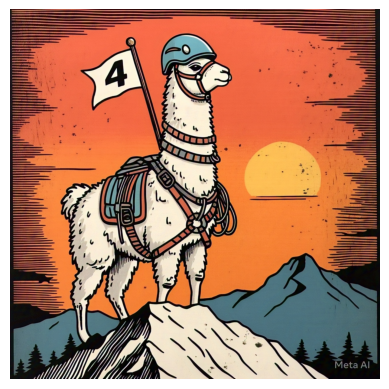

In [10]:
img_url = "../src/docs/img/a_llama_dressed_as_a_professional_mountain.jpeg"
display(img_url)

In [6]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "url": img_url},
            {"type": "text", "text": "Describe this image in two sentences."},
        ]
    },
]

inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

outputs = model.generate(
    **inputs,
    max_new_tokens=256,
)

response = processor.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])[0]
print(response)

The image depicts a cartoon-style illustration of a llama standing on a rocky outcropping, set against a vibrant orange sky with a sunset. The llama is adorned with a blue helmet and a saddle, and it holds a flag bearing the number 4, exuding a sense of adventure and playfulness.<|eot|>


### Multimodal: Understanding Multiple Images

Llama 4 Scout can process information from multiple images - the number of images you can pass in a single request is only limited by the available memory. To prevent OOM errors, try downsizing the images before passing it to the model. 

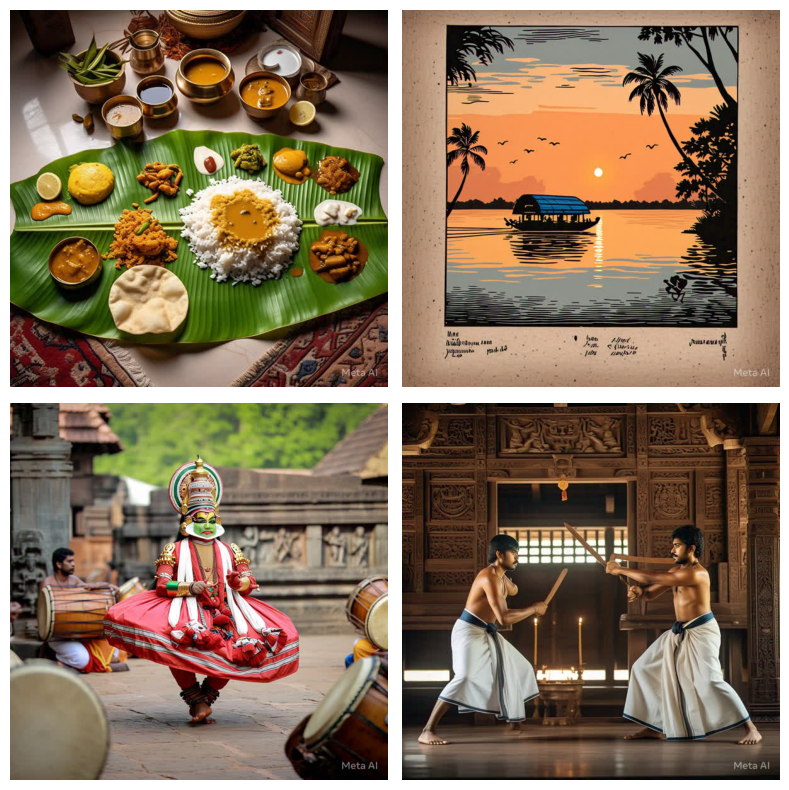

In [14]:
#images = ["../src/docs/img/k1.jpg", "../src/docs/img/k2.jpg", "../src/docs/img/k3.jpg", "../src/docs/img/k4.jpg"]
images = ["./img/k1.jpg", "./img/k2.jpg", "./img/k3.jpg", "./img/k4.jpg"]
resized_imgs = [resize(im) for im in images]
display_grid(resized_imgs)

We pass these 4 downscaled images to Llama 4, and ask it to guess what location these are about. And just for fun, we ask it to write a couplet describing this place.

In [16]:
content = [{"type": "image", "url": u} for u in resized_imgs]
content += {"type": "text", "text": "Look at these photos in my camera roll. Now write a couplet about the place I am in."},

messages = [
    {
        "role": "user",
        "content": content
    },
]

inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

outputs = model.generate(
    **inputs,
    max_new_tokens=256,
)

response = processor.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])[0]
print(response)


Based on the images you've shown me, it seems like you're in Kerala, India. Here's a couplet that captures the essence of this beautiful place:

"In Kerala's lush green land so fair,
A land of spices, dance, and culinary care."<|eot|>


## Function Calling with Image Understanding

Function calling now works natively with images, i.e. the model can understand the images and return the appropriate function-call. In this example, we ask Llama to book us tickets to the place shown in the photos.

In [18]:
functions_prompt = """
You have access to the following functions:
1.  **Book Travel Tickets**: Use this function to assist users in booking travel tickets.
    `{   "name": "book_travel_tickets",   "description": "Books travel tickets for the user",   "parameters": {     "destination": {"description": "The destination of the travel", "param_type": "str", "required": true},     "travel_dates": {"description": "The dates of travel", "param_type": "str", "required": true},     "number_of_passengers": {"description": "The number of passengers", "param_type": "int", "required": true},     "travel_class": {"description": "The preferred travel class (e.g., economy, business)", "param_type": "str", "required": false}   } }`

2.  **Check Weather**: Use this function to provide current weather information for a specified location.
    `{   "name": "check_weather",   "description": "Checks the current weather for a specified location",   "parameters": {     "location": {"description": "The location to check the weather for", "param_type": "str", "required": true}   } }`

Think very carefully before calling functions. If you choose to call a function, ONLY reply in the following format with no prefix or suffix:

<function=example\_function\_name>{"example\_name": "example\_value"}</function>

Reminder:

*   Function calls MUST follow the specified format, start with <function= and end with </function>
*   Required parameters MUST be specified
*   Only call one function at a time
*   Put the entire function call reply on one line"""


messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "url": resized_imgs[0]},
            {"type": "image", "url": resized_imgs[1]},
            {"type": "text", "text": f"{functions_prompt}\n\nBook me tickets to go the place shown in these photos"}
        ]
    }
]

inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

outputs = model.generate(
    **inputs,
    max_new_tokens=256,
)

response = processor.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])[0]
print(response)

<function=book_travel_tickets>{"destination": "Kerala", "travel_dates": "2024-03-20 to 2024-03-25", "number_of_passengers": "2", "travel_class": "economy"}<|eot|>


The function definitions can also be passed in the system prompt instead. Let's also change the definition format to JSON:

In [19]:
function_definitions = """Here is a list of functions in JSON format that you can invoke:
[
    {
        "name": "get_user_info",
        "description": "Retrieve details for a specific user by their unique identifier. Note that the provided function is in Python 3 syntax.",
        "parameters": {
            "type": "dict",
            "required": [
                "user_id"
            ],
            "properties": {
                "user_id": {
                "type": "integer",
                "description": "The unique identifier of the user. It is used to fetch the specific user details from the database."
            },
            "special": {
                "type": "string",
                "description": "Any special information or parameters that need to be considered while fetching user details.",
                "default": "none"
                }
            }
        }
    }
]

Should you decide to return the function call(s), put them in the format of [func1(params_name=params_value, params_name2=params_value2...), func2(params)]

You SHOULD NOT include any other text in the response."""

messages = [
    {
        "role": "system",
        "content": function_definitions
    },
    {
        "role": "user",
        "content": "Can you retrieve the details for the user with the ID 7890, who has black as their special request?"
    }
]

inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

outputs = model.generate(
    **inputs,
    max_new_tokens=256,
)

response = processor.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])[0]
print(response)

[get_user_info(user_id=7890, special='black')]<|eot|>


## More resources:

- [Checkout llama.com](https://www.llama.com)
- [Checkout llama-cookbook](https://github.com/meta-llama/llama-cookbook)
- [Sign up for llama-con](https://www.llama.com/events/llamacon/signup/)
- [Huggingface page](http://Huggingface.co/meta-llama)
- [vllm read the docs](https://docs.vllm.ai/en/latest/)